In [216]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot, add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')


# matplotlib.rc("font", family = "NanumGothic")
# matplotlib.rc("axes", unicode_minus = False)

In [217]:
df_raw = pd.read_csv("C:/Users/PIAI/csv_file/SCALE불량.csv", encoding = 'euc=kr')
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


### 1. 데이터 전처리

In [218]:
print("Raw Data :" ,df_raw.shape)

Raw Data : (1000, 22)


In [219]:
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [220]:
df_raw.dtypes

plate_no           object
rolling_date       object
scale              object
spec_long          object
spec_country       object
steel_kind         object
pt_thick            int64
pt_width            int64
pt_length           int64
hsb                object
fur_no             object
fur_input_row      object
fur_heat_temp       int64
fur_heat_time       int64
fur_soak_temp       int64
fur_soak_time       int64
fur_total_time      int64
fur_ex_temp         int64
rolling_method     object
rolling_temp        int64
descaling_count     int64
work_group         object
dtype: object

In [221]:
df_raw['spec_long'].unique()

array(['AB/EH32-TM', 'NV-E36-TM', 'BV-EH36-TM', 'AB/EH36-TM', 'COMMON',
       'BV-AH32-TM', 'GL-E32-TM', 'GL-E36-TM', 'BV-EH32-TM', 'KS-HSB600',
       'LR-EH36-TM', 'BV-B', 'AB/B', 'LR-B', 'JS-SM490YB', 'KR-B', 'LR-A',
       'JS-SM490A', 'KS-SM400B', 'JS-SM400B', 'KS-SS400', 'KR-A',
       'JS-SS400', 'NV-A', 'KS-SM400A', 'KS-SM490B', 'V42JBN3', 'AB/A',
       'A516-60', 'BV-AH32', 'JS-SM490YA', 'AB/AH32', 'GL-A32', 'LR-AH32',
       'CCS-B', 'NV-B', 'NV-A32', 'KS-SM490A', 'GL-A', 'NK-KA32',
       'LR-AH36', 'A709-36', 'KR-AH32', 'BV-A', 'NK-KA', 'NV-D36-TM',
       'NK-KA32-TM', 'GL-A32-TM', 'LR-AH36-TM', 'LR-EH32-TM', 'NV-E32-TM',
       'KS-HSB500', 'API-2W-50T', 'GL-A36-TM', 'NV-A32-TM', 'NV-D32-TM',
       'NK-KD36-TM', 'GL-D36-TM', 'PILAC-BT33', 'NV-A36-TM', 'BV-AH36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'SA283-C', 'A283-C', 'JS-SM400A'],
      dtype=object)

In [222]:
df_raw.drop(["plate_no", "rolling_date", "work_group", "spec_long"], axis=1, inplace=True)
df_raw.head()

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count
0,양품,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8
1,양품,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8
2,양품,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8
3,양품,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8
4,양품,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8


Plate 번호, 열연작업시각, 작업조(work group)는 Scale 불량 발생에 영향을 주지 않을 것 같아서 삭제, spec_long 변수도 고유값이 너무 많아 불필요할 것 같아서 삭제.

In [223]:
df_raw.describe()

,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,26.78200,2831.900000,36788.200000,1157.245000,85.972000,1150.928000,71.720000,238.589000,1150.928000,934.637000,8.557000
std,18.13757,494.081478,13912.387116,21.245007,26.346297,17.344384,20.602137,38.194828,17.344384,96.598015,1.604158
min,12.00000,1800.000000,7900.000000,1103.000000,55.000000,1113.000000,35.000000,165.000000,1113.000000,0.000000,5.000000
25%,15.00000,2500.000000,26650.000000,1140.000000,66.000000,1135.750000,57.750000,210.000000,1135.750000,893.750000,8.000000
50%,19.00000,2800.000000,40400.000000,1159.000000,75.000000,1156.000000,66.000000,230.000000,1156.000000,948.000000,9.000000
75%,34.00000,3100.000000,49100.000000,1173.000000,102.250000,1164.000000,81.000000,263.000000,1164.000000,991.000000,10.000000
max,100.00000,4600.000000,54900.000000,1206.000000,158.000000,1185.000000,145.000000,362.000000,1185.000000,1078.000000,10.000000


rolling_temp에서 이상치가 존재하는것처럼 보인다. 

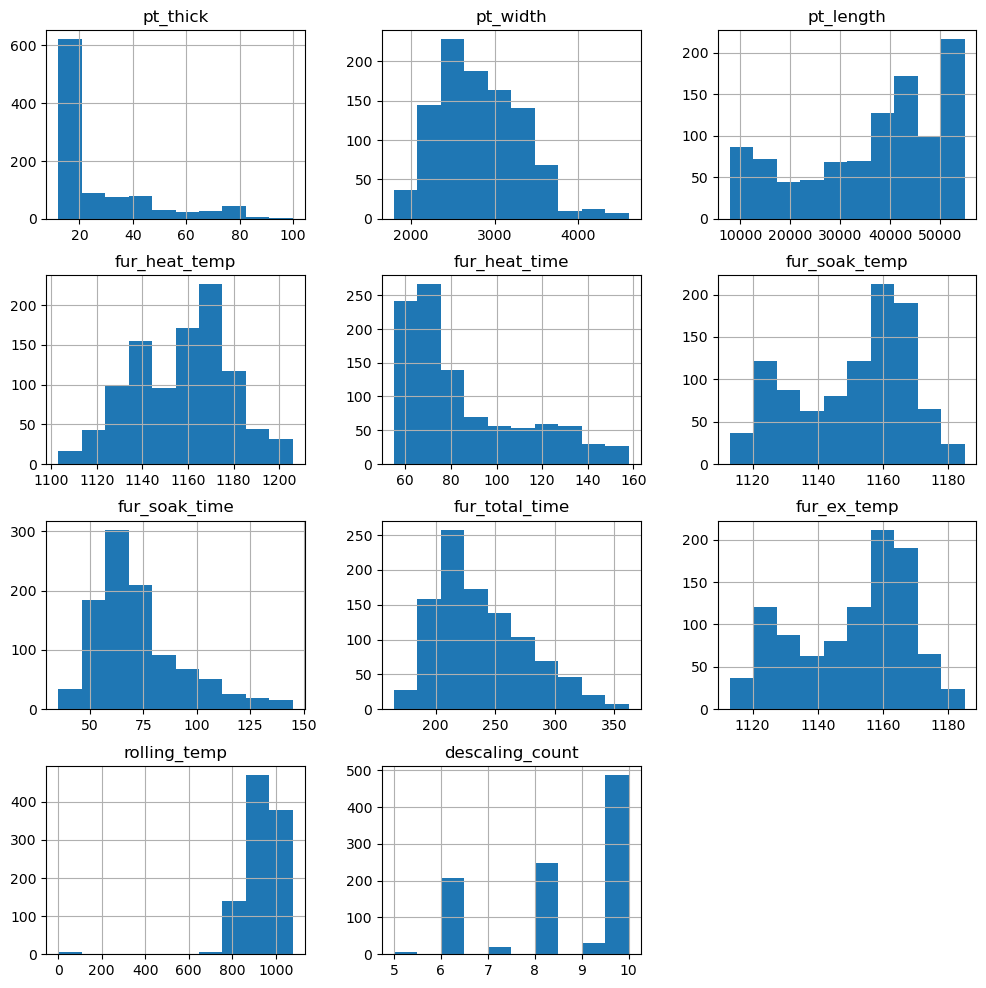

In [224]:
df_raw.hist(figsize = (12, 12))
plt.show()

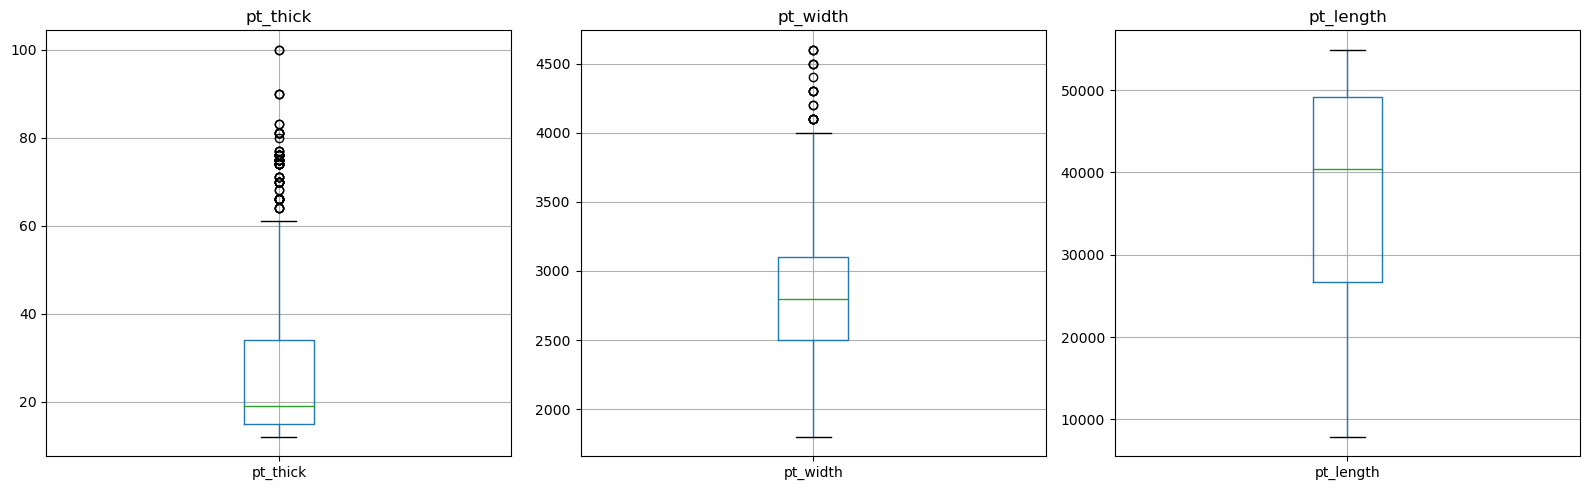

In [225]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
df_raw.boxplot(column='pt_thick', ax=axes[0])
axes[0].set_title('pt_thick')
df_raw.boxplot(column='pt_width', ax=axes[1])
axes[1].set_title('pt_width')
df_raw.boxplot(column='pt_length', ax=axes[2])
axes[2].set_title('pt_length')
plt.tight_layout()
plt.show()

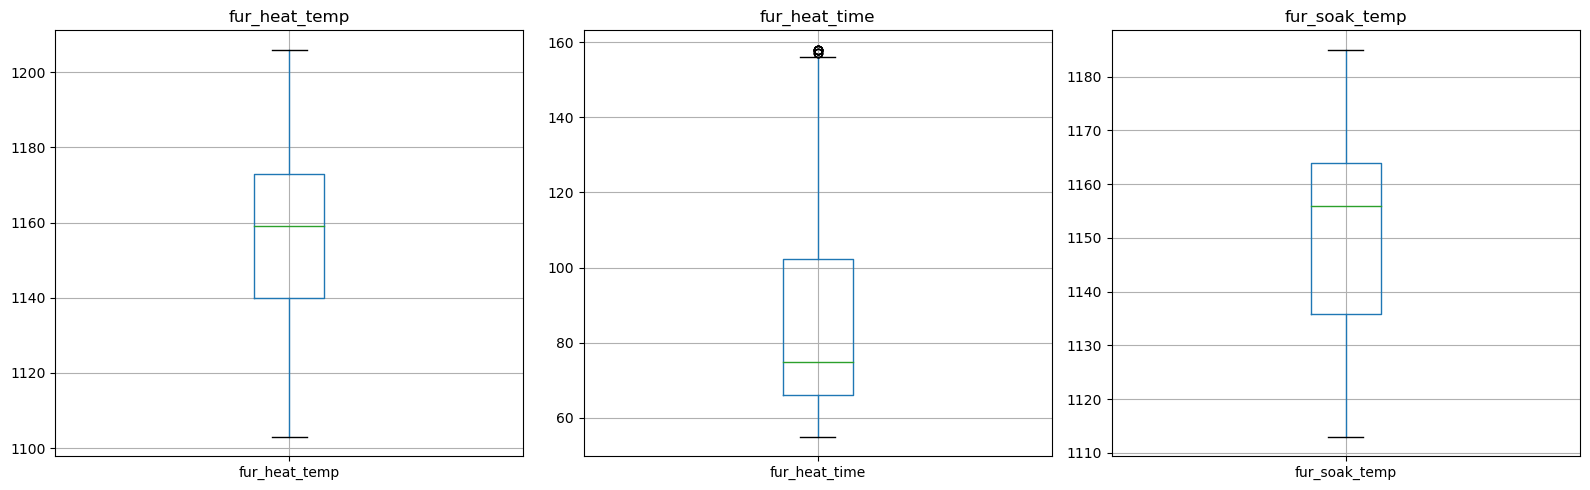

In [226]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
df_raw.boxplot(column='fur_heat_temp', ax=axes[0])
axes[0].set_title('fur_heat_temp')
df_raw.boxplot(column='fur_heat_time', ax=axes[1])
axes[1].set_title('fur_heat_time')
df_raw.boxplot(column='fur_soak_temp', ax=axes[2])
axes[2].set_title('fur_soak_temp')
plt.tight_layout()
plt.show()

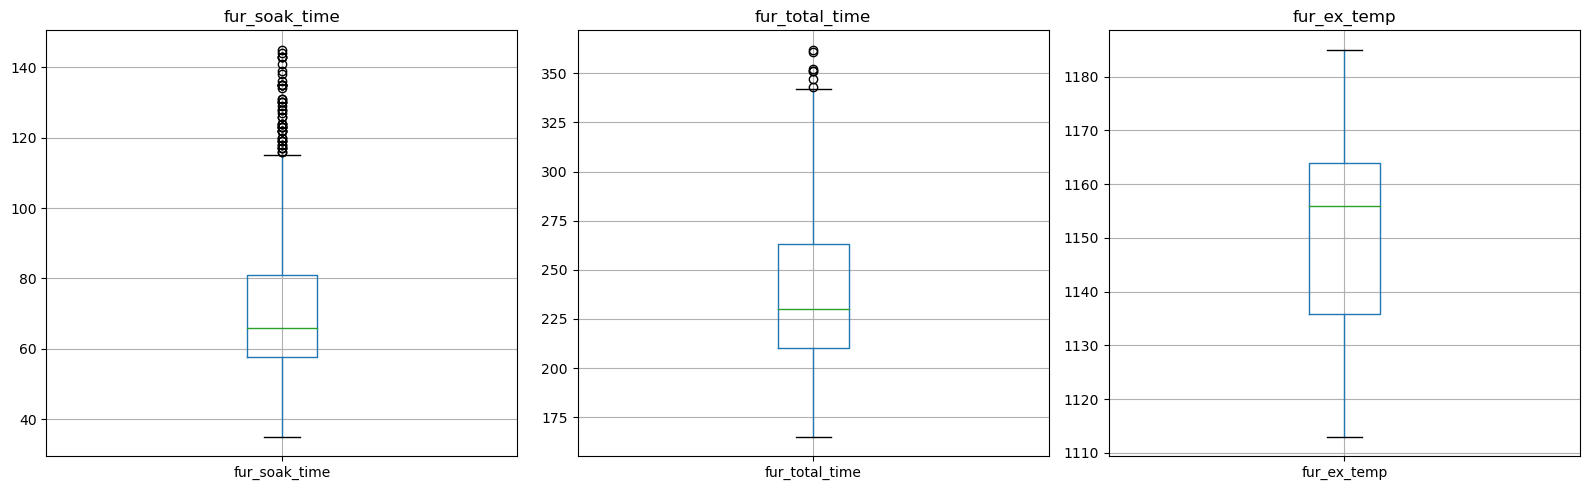

In [227]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
df_raw.boxplot(column='fur_soak_time', ax=axes[0])
axes[0].set_title('fur_soak_time')
df_raw.boxplot(column='fur_total_time', ax=axes[1])
axes[1].set_title('fur_total_time')
df_raw.boxplot(column='fur_ex_temp', ax=axes[2])
axes[2].set_title('fur_ex_temp')
plt.tight_layout()
plt.show()

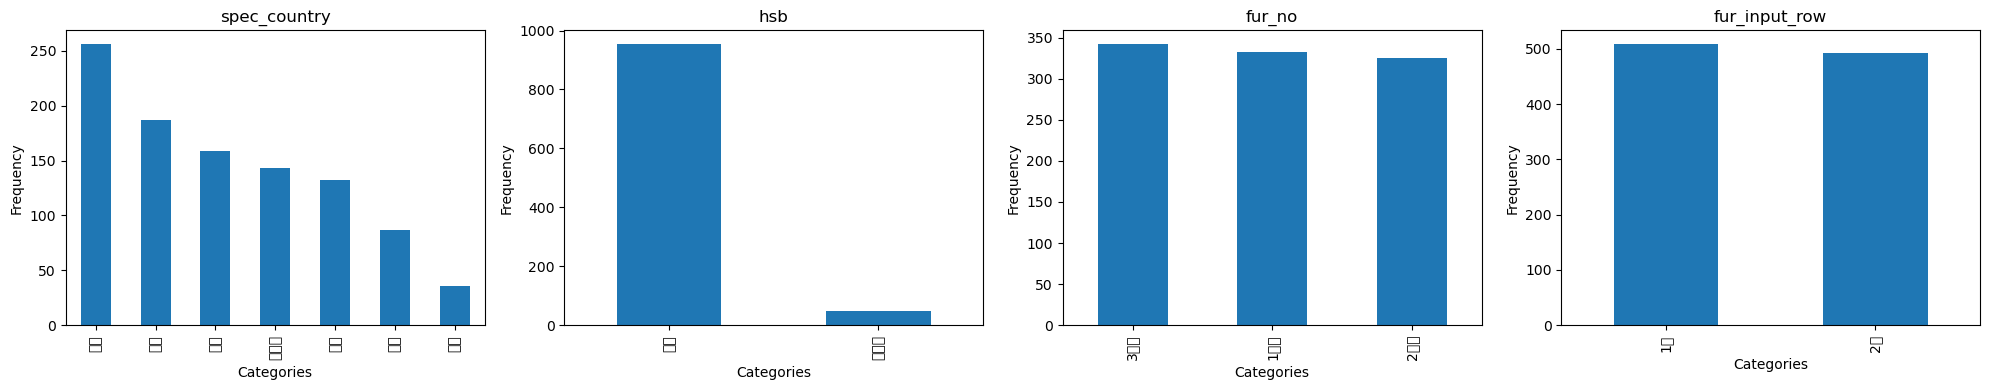

In [228]:
import matplotlib.pyplot as plt

# 범주형 변수들의 값이 저장된 데이터프레임
df_categorical = df_raw[['spec_country', 'hsb', 'fur_no', 'fur_input_row']]

# 한 레이아웃에 출력될 그래프의 행과 열 개수
rows = 1
cols = 4

# 전체 그래프의 크기 설정
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 4))

# 각 범주형 변수별로 막대 그래프 또는 빈도표 생성
for i, column in enumerate(df_categorical.columns):
    ax = axes[i]
    
    # 각 카테고리별 빈도수 계산
    category_counts = df_categorical[column].value_counts()
    
    # 막대 그래프 그리기
    category_counts.plot(kind='bar', ax=ax)
    
    # 그래프 제목 설정
    ax.set_title(f'{column}')
    
    # x축 레이블 설정
    ax.set_xlabel('Categories')
    
    # y축 레이블 설정
    ax.set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()


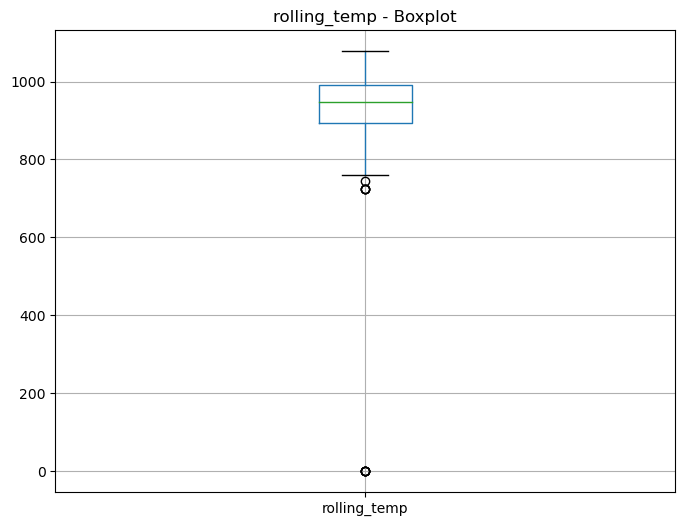

In [229]:
fig, ax = plt.subplots(figsize=(8, 6))
df_raw.boxplot(column='rolling_temp', ax=ax)
ax.set_title('rolling_temp - Boxplot')
plt.show()

<Axes: >

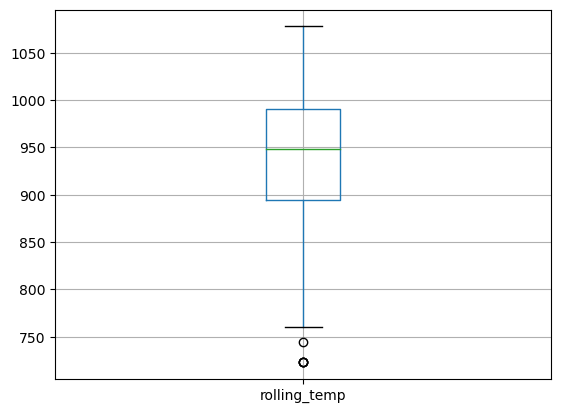

In [230]:
df_raw = df_raw[df_raw['rolling_temp'] > 500]
df_raw.reset_index(drop=True, inplace=True)
df_raw.boxplot('rolling_temp')

rolling_temp의 이상치 제거

In [231]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scale            994 non-null    object
 1   spec_country     994 non-null    object
 2   steel_kind       994 non-null    object
 3   pt_thick         994 non-null    int64 
 4   pt_width         994 non-null    int64 
 5   pt_length        994 non-null    int64 
 6   hsb              994 non-null    object
 7   fur_no           994 non-null    object
 8   fur_input_row    994 non-null    object
 9   fur_heat_temp    994 non-null    int64 
 10  fur_heat_time    994 non-null    int64 
 11  fur_soak_temp    994 non-null    int64 
 12  fur_soak_time    994 non-null    int64 
 13  fur_total_time   994 non-null    int64 
 14  fur_ex_temp      994 non-null    int64 
 15  rolling_method   994 non-null    object
 16  rolling_temp     994 non-null    int64 
 17  descaling_count  994 non-null    in

## 연속형 데이터 양품,불량 기준

In [232]:
def fun_plot_hist(data, var):
    plt.hist(data[data["scale"] == "양품"][var], label = "good", alpha = 0.5)
    plt.hist(data[data["scale"] == "불량"][var], label = "bad", alpha = 0.5)
    plt.title(var)
    plt.legend()

## 범주형 데이터(카이제곱 검정)

In [233]:
def fun_print_crosstab(data, var):
    return pd.crosstab(data["scale"], data[var], margins=True)

In [234]:
def perform_chi_square(data, var):
    crosstab = pd.crosstab(data["scale"], data[var])
    chi2, p_value, _, _ = stats.chisquare(crosstab)
    return chi2, p_value

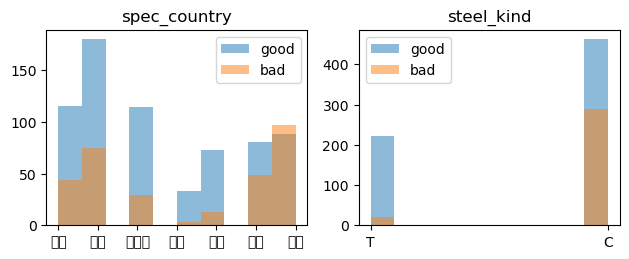

In [235]:
plt.subplot(2, 2, 1)
fun_plot_hist(df_raw, "spec_country")
plt.subplot(2, 2, 2)
fun_plot_hist(df_raw, "steel_kind")
plt.tight_layout()

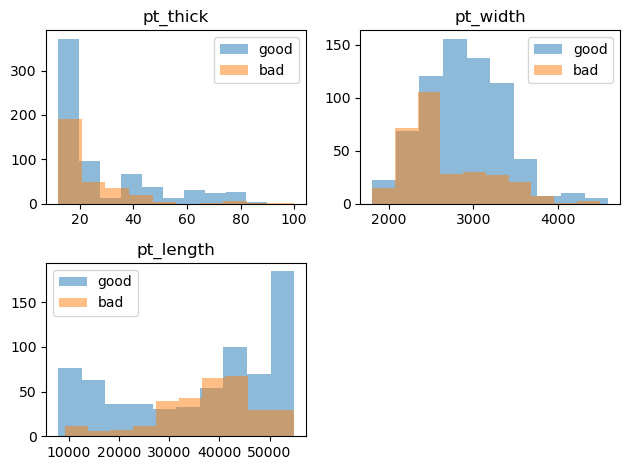

In [236]:
plt.subplot(2, 2, 1)
fun_plot_hist(df_raw, "pt_thick")
plt.subplot(2, 2, 2)
fun_plot_hist(df_raw, "pt_width")
plt.subplot(2, 2, 3)
fun_plot_hist(df_raw, "pt_length")

plt.tight_layout()

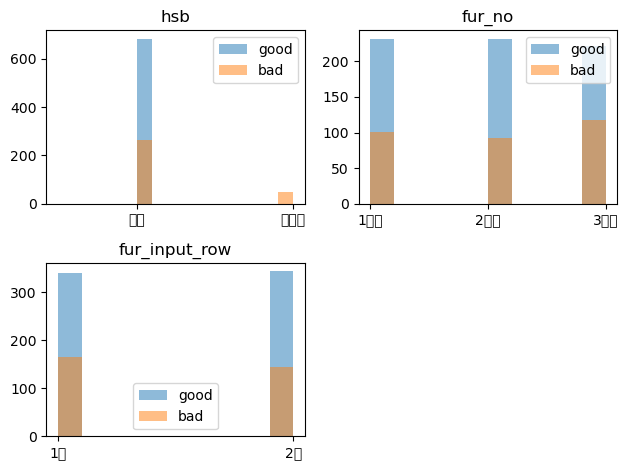

In [237]:
plt.subplot(2, 2, 1)
fun_plot_hist(df_raw, "hsb")
plt.subplot(2, 2, 2)
fun_plot_hist(df_raw, "fur_no")
plt.subplot(2, 2, 3)
fun_plot_hist(df_raw, "fur_input_row")

plt.tight_layout()

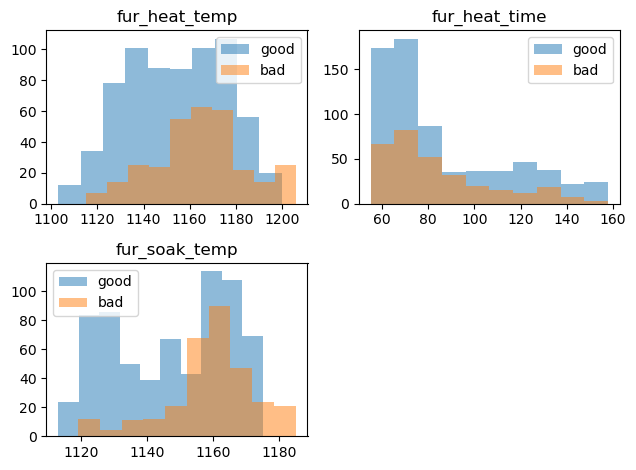

In [238]:
plt.subplot(2, 2, 1)
fun_plot_hist(df_raw, "fur_heat_temp")
plt.subplot(2, 2, 2)
fun_plot_hist(df_raw, "fur_heat_time")
plt.subplot(2, 2, 3)
fun_plot_hist(df_raw, "fur_soak_temp")

plt.tight_layout()

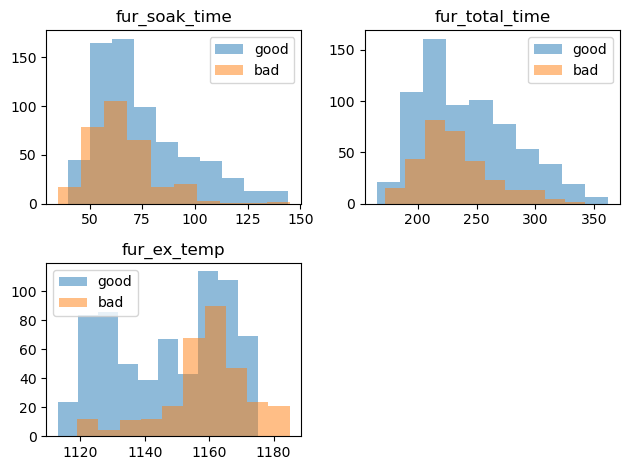

In [239]:
plt.subplot(2, 2, 1)
fun_plot_hist(df_raw, "fur_soak_time")
plt.subplot(2, 2, 2)
fun_plot_hist(df_raw, "fur_total_time")
plt.subplot(2, 2, 3)
fun_plot_hist(df_raw, "fur_ex_temp")

plt.tight_layout()

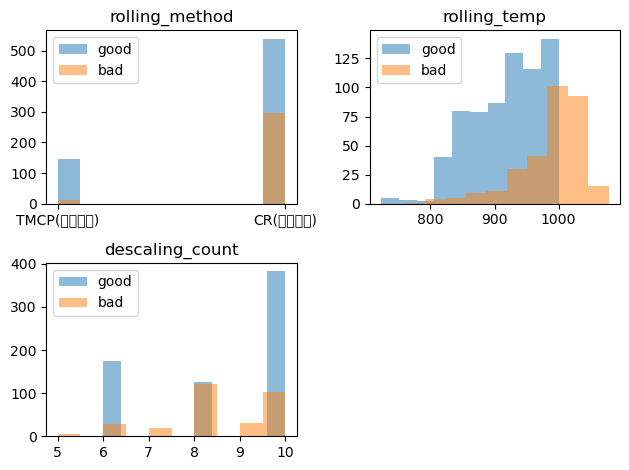

In [240]:
plt.subplot(2, 2, 1)
fun_plot_hist(df_raw, "rolling_method")
plt.subplot(2, 2, 2)
fun_plot_hist(df_raw, "rolling_temp")
plt.subplot(2, 2, 3)
fun_plot_hist(df_raw, "descaling_count")

plt.tight_layout()

## 목표변수 변환

In [241]:
df_raw["scale"] = np.where(df_raw["scale"] == "불량", 1, 0)

In [242]:
df_raw.head()

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,1133,59,259,1133,TMCP(온도제어),934,8
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,1135,53,238,1135,TMCP(온도제어),937,8
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,1121,55,258,1121,TMCP(온도제어),889,8
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,1127,68,266,1127,TMCP(온도제어),885,8
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,1128,48,246,1128,TMCP(온도제어),873,8


In [243]:
df_raw.corr()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_temp,descaling_count
scale,1.000000,-0.094441,-0.193817,0.048928,0.220581,-0.036178,0.326957,-0.220873,-0.129333,0.326957,0.511333,-0.043415
pt_thick,-0.094441,1.000000,-0.320606,-0.866691,-0.522101,0.205822,-0.663015,0.363622,0.343731,-0.663015,-0.450942,-0.845154
pt_width,-0.193817,-0.320606,1.000000,0.148769,0.201312,-0.103698,0.218066,-0.101242,-0.137791,0.218066,-0.155038,0.353954
pt_length,0.048928,-0.866691,0.148769,1.000000,0.466737,-0.135821,0.599513,-0.336363,-0.278400,0.599513,0.366254,0.816850
fur_heat_temp,0.220581,-0.522101,0.201312,0.466737,1.000000,-0.161504,0.785440,-0.375056,-0.314602,0.785440,0.341403,0.483688
fur_heat_time,-0.036178,0.205822,-0.103698,-0.135821,-0.161504,1.000000,-0.347486,0.114218,0.736399,-0.347486,-0.131929,-0.163866
fur_soak_temp,0.326957,-0.663015,0.218066,0.599513,0.785440,-0.347486,1.000000,-0.601144,-0.564089,1.000000,0.628510,0.623454
fur_soak_time,-0.220873,0.363622,-0.101242,-0.336363,-0.375056,0.114218,-0.601144,1.000000,0.632780,-0.601144,-0.486545,-0.402145
fur_total_time,-0.129333,0.343731,-0.137791,-0.278400,-0.314602,0.736399,-0.564089,0.632780,1.000000,-0.564089,-0.345276,-0.340797
fur_ex_temp,0.326957,-0.663015,0.218066,0.599513,0.785440,-0.347486,1.000000,-0.601144,-0.564089,1.000000,0.628510,0.623454


### 수치형 변수와 목표변수의 상관관계

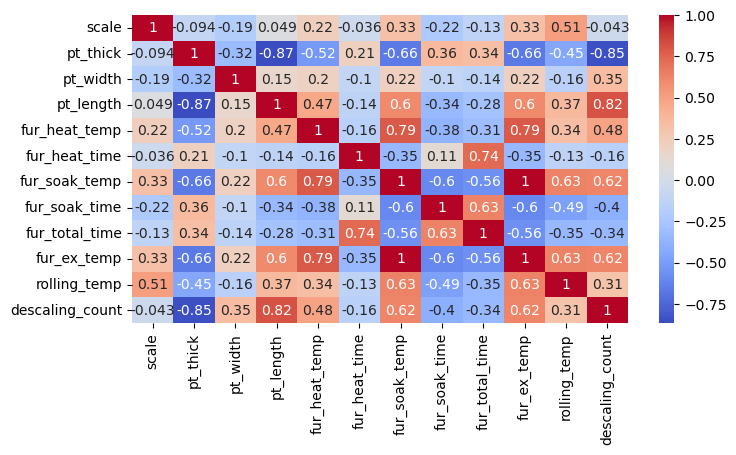

In [244]:
plt.figure(figsize = (8,4))
sns.heatmap(df_raw.corr(),annot= True, cmap= "coolwarm")
plt.show()

rolling_temp(압연온도), pt_length(후판 지시길이)순으로 중요도가 높게 나타남.

### 범주형 변수와 목표변수의 상관관계

In [246]:
dummy_variables = pd.get_dummies(df_raw['hsb'], prefix='hsb')

combined_df = pd.concat([df_raw['scale'], dummy_variables], axis=1)

correlation_matrix = combined_df.corr()
print(correlation_matrix)

            scale   hsb_미적용    hsb_적용
scale    1.000000  0.330919 -0.330919
hsb_미적용  0.330919  1.000000 -1.000000
hsb_적용  -0.330919 -1.000000  1.000000


In [247]:
dummy_variables = pd.get_dummies(df_raw['steel_kind'], prefix='steel_kind')

combined_df = pd.concat([df_raw['scale'], dummy_variables], axis=1)

correlation_matrix = combined_df.corr()
print(correlation_matrix)

                 scale  steel_kind_C  steel_kind_T
scale         1.000000      0.279514     -0.279514
steel_kind_C  0.279514      1.000000     -1.000000
steel_kind_T -0.279514     -1.000000      1.000000


In [248]:
dummy_variables = pd.get_dummies(df_raw['fur_no'], prefix='fur_no')

combined_df = pd.concat([df_raw['scale'], dummy_variables], axis=1)

correlation_matrix = combined_df.corr()
print(correlation_matrix)

               scale  fur_no_1호기  fur_no_2호기  fur_no_3호기
scale       1.000000   -0.011701   -0.041912    0.053120
fur_no_1호기 -0.011701    1.000000   -0.492465   -0.508331
fur_no_2호기 -0.041912   -0.492465    1.000000   -0.499162
fur_no_3호기  0.053120   -0.508331   -0.499162    1.000000


In [249]:
dummy_variables = pd.get_dummies(df_raw['fur_input_row'], prefix='fur_input_row')

combined_df = pd.concat([df_raw['scale'], dummy_variables], axis=1)

correlation_matrix = combined_df.corr()
print(correlation_matrix)

                     scale  fur_input_row_1열  fur_input_row_2열
scale             1.000000          0.032601         -0.032601
fur_input_row_1열  0.032601          1.000000         -1.000000
fur_input_row_2열 -0.032601         -1.000000          1.000000


## 모델링

## Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [169]:
df_raw_y = df_raw["scale"]
df_raw_x = df_raw.drop(["scale"], axis=1, inplace=False)
df_raw_x.shape

(994, 17)

In [170]:
df_raw_x_dummy = pd.get_dummies(df_raw_x)
df_raw_x_dummy.head()
df_raw_x_dummy.shape

(994, 29)

In [171]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x_dummy, df_raw_y, 
                                                                test_size=0.3, random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (695, 29)
train data Y size: (695,)
test data X size: (299, 29)
test data Y size: (299,)


In [172]:
tree_graph = DecisionTreeClassifier(random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

# Train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_graph.score(df_train_x, df_train_y)))
#test데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_graph.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.993


In [173]:
param_grid = {
    "max_depth": range(2, 10),
    "min_samples_split": range(2, 40, 2),
    "min_samples_leaf": range(2, 20, 2)
}

In [174]:
dt_model = DecisionTreeClassifier()
dt_model.fit(df_train_x, df_train_y)

DecisionTreeClassifier()

In [175]:
grid_dt = GridSearchCV(dt_model, param_grid, cv =3 , n_jobs = -1)
grid_dt.fit(df_train_x,df_train_y)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [176]:
print("best model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))
print("\nbest set score: \n{}".format(grid_dt.score(df_test_x,df_test_y).round(3)))

best model: 
DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=6)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 6}

best score: 
0.991

best set score: 
0.993


In [250]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 2,min_samples_split = 6,max_depth = 9, random_state=1234,)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=6,
                       random_state=1234)

In [251]:
tree_pred = tree_final.predict(df_test_x)

In [252]:
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.999
Score on test set: 0.993


In [253]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["importance"] = tree_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
9,rolling_temp,0.520
10,descaling_count,0.176
20,hsb_미적용,0.151
8,fur_ex_temp,0.145
2,pt_length,0.005
7,fur_total_time,0.003
19,steel_kind_T,0.000
21,hsb_적용,0.000
22,fur_no_1호기,0.000
23,fur_no_2호기,0.000


Text(0, 0.5, '변수')

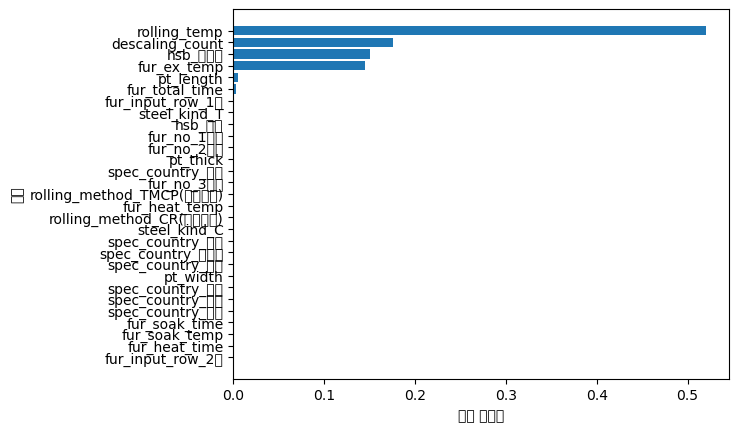

In [254]:
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## 랜덤 포레스트

In [182]:
rf_model = RandomForestClassifier()
rf_model.fit (df_train_x, df_train_y)

RandomForestClassifier()

In [183]:
train_pred = rf_model.predict(df_train_x)
rf_model.score(df_train_x, df_train_y)

1.0

In [184]:
test_pred = rf_model.predict(df_test_x)
rf_model.score(df_test_x, df_test_y)

0.9698996655518395

In [185]:
param_grid = {"max_depth" : range(2, 10),
             "min_samples_split" : range(2, 40, 2),
             "min_samples_leaf" : range(2, 20, 2)}

In [186]:
grid_rf = GridSearchCV(rf_model, param_grid, cv=3, n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [187]:
print("best model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))
print("\nbest set score: \n{}".format(grid_rf.score(df_test_x,df_test_y).round(3)))

best model: 
RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=10)

best parameter: 
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}

best score: 
0.958

best set score: 
0.963


In [255]:
rf_final = RandomForestClassifier(min_samples_leaf = 2, min_samples_split = 10,
                                max_depth = 6, random_state = 1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=10,
                       random_state=1234)

In [256]:
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.957
Score on test set : 0.967


In [257]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["importance"] = rf_final.feature_importances_

df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
9,rolling_temp,0.371
8,fur_ex_temp,0.089
5,fur_soak_temp,0.086
10,descaling_count,0.068
20,hsb_미적용,0.065
21,hsb_적용,0.061
1,pt_width,0.047
0,pt_thick,0.042
2,pt_length,0.035
3,fur_heat_temp,0.028


Text(0, 0.5, '변수')

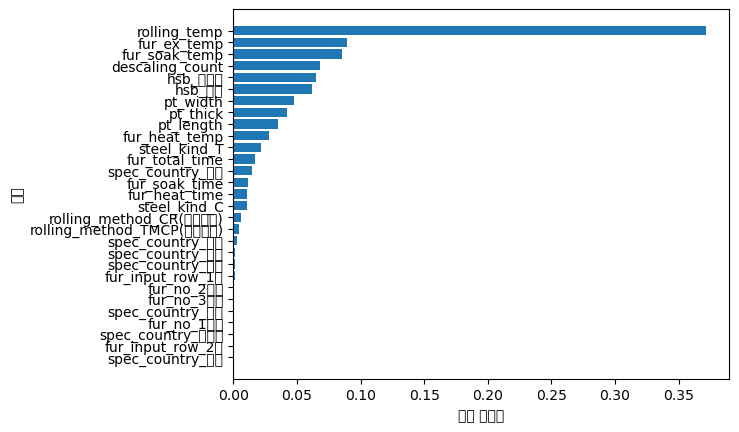

In [258]:
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## 그레디언트 부스팅

In [192]:
gb_model = GradientBoostingClassifier()
gb_model.fit (df_train_x, df_train_y)

GradientBoostingClassifier()

In [193]:
train_pred = gb_model.predict(df_train_x)
gb_model.score(df_train_x, df_train_y)

1.0

In [194]:
test_pred = gb_model.predict(df_test_x)
gb_model.score(df_test_x, df_test_y)

0.9966555183946488

In [195]:
param_grid = {"max_depth" : range(2, 10),
             "min_samples_split" : range(2, 40, 2),
             "min_samples_leaf" : range(2, 20, 2)}

In [196]:
grid_gb = GridSearchCV(gb_model, param_grid, cv=3, n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 20, 2),
                         'min_samples_split': range(2, 40, 2)})

In [197]:
print("best model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))
print("\nbest set score: \n{}".format(grid_gb.score(df_test_x,df_test_y).round(3)))

best model: 
GradientBoostingClassifier(max_depth=9, min_samples_leaf=2,
                           min_samples_split=26)

best parameter: 
{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 26}

best score: 
0.994

best set score: 
0.993


In [198]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 2, min_samples_split = 26,
                                max_depth = 9, random_state = 1234)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingClassifier(max_depth=9, min_samples_leaf=2,
                           min_samples_split=26, random_state=1234)

In [199]:
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.993


In [200]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
9,rolling_temp,0.370
8,fur_ex_temp,0.091
5,fur_soak_temp,0.081
10,descaling_count,0.081
20,hsb_미적용,0.064
21,hsb_적용,0.055
1,pt_width,0.052
0,pt_thick,0.048
3,fur_heat_temp,0.028
2,pt_length,0.028


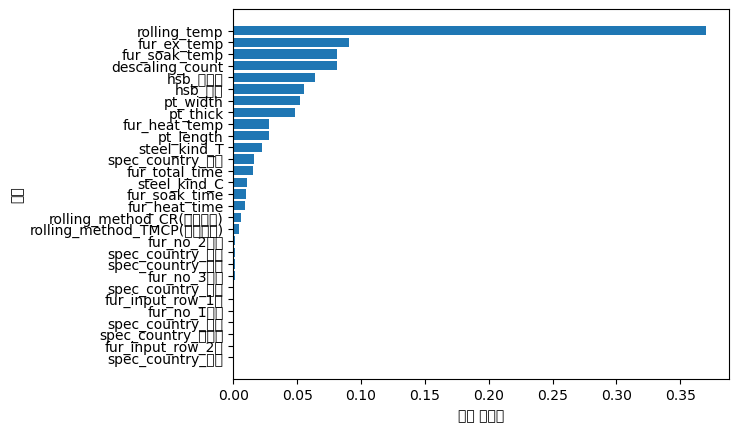

In [201]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")
plt.show()

## 모델 평가

## confusion matrix

In [202]:
# 의사결정나무
tree_pred = tree_final.predict(df_test_x)
print("Accuracy:{0:.3f}\n".format(tree_graph.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, tree_pred)))

Accuracy:0.993

Confusion Matrix: 
[[211   0]
 [  2  86]]


In [203]:
# 랜덤포레스트
rf_pred = rf_final.predict(df_test_x)
print("Accuracy on test set: {:.3f}".format(grid_rf.score(df_test_x, df_test_y)))
print("Comfusion Matrix: \n{}".format(confusion_matrix(df_test_y, rf_pred)))

Accuracy on test set: 0.963
Comfusion Matrix: 
[[211   0]
 [ 10  78]]


In [204]:
# 그레디언트 부스팅
gb_pred = gb_final.predict(df_test_x)
print("Accuracy on test set: {:.3f}".format(grid_gb.score(df_test_x, df_test_y)))
print("Comfusion Matrix: \n{}".format(confusion_matrix(df_test_y, gb_pred)))

Accuracy on test set: 0.993
Comfusion Matrix: 
[[210   1]
 [  1  87]]
